# Part 1

## Centrality measures

### 1. Constructing the networks

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [3]:
#OK, let us start with the graphml file for London's underground

G = nx.read_graphml('london.graph.xml')

In [4]:
type(G)

networkx.classes.graph.Graph

In [5]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [6]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [7]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [9]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

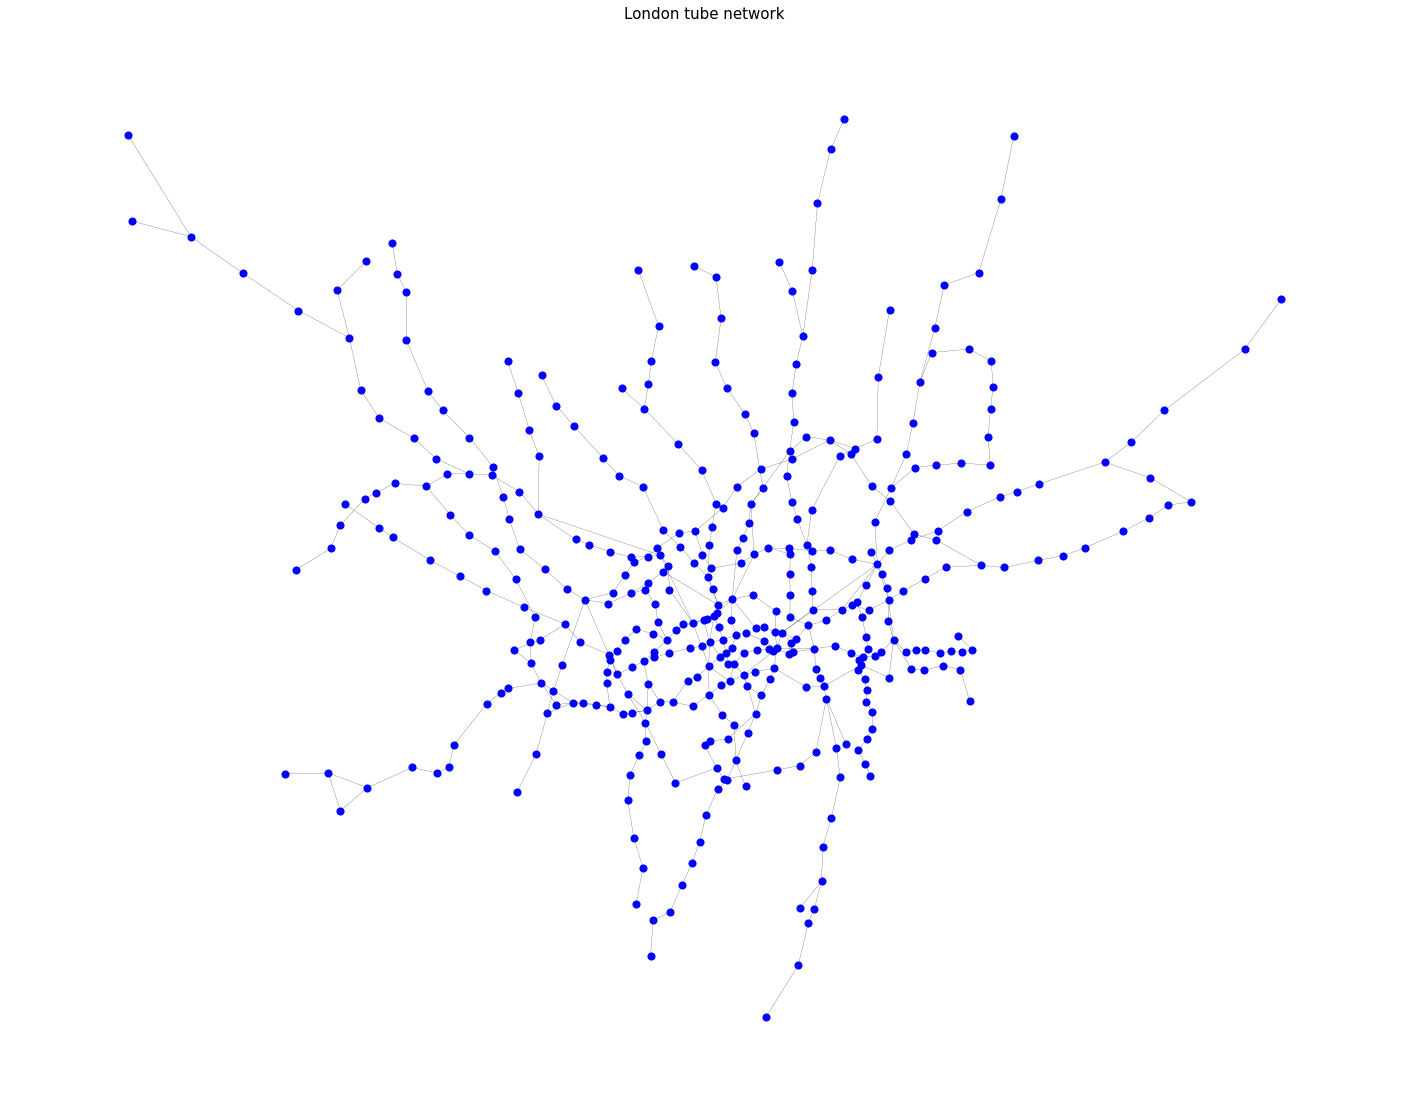

In [10]:
# Let's plot the underground network! 

# We can plot the underground network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'id')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [11]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,flows,length
0,Wembley Park,Kingsbury,Jubilee,12356,2916.771558
1,Wembley Park,Neasden,Jubilee,6744,2353.165938
2,Wembley Park,Preston Road,Metropolitan,36601,1419.735166
3,Wembley Park,Finchley Road,Metropolitan,55216,7266.373927
4,Kingsbury,Queensbury,Jubilee,9419,1245.995234
5,Queensbury,Canons Park,Jubilee,6385,1693.307343
6,Canons Park,Stanmore,Jubilee,3624,1419.669476
7,Stratford,West Ham,Jubilee,91801,1673.509515
8,Stratford,Mile End,Central,12010,2805.001392
9,Stratford,Leyton,Central,56082,2131.342926


### 2.  Exploring the network:

In [12]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
#This distance in given in meters

7266.37392749648

In [13]:
# diameter of the network
nx.diameter(G)

36

In [14]:
# diameter of the network considering the distance between stations (weighted diameter)

nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

78581.28589029584

### 3.  Centrality measures

#### Degree Centrality on nodes:

In [15]:
#  We can calculate the degree centrality using networkx function:
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london),'degree')

In [16]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


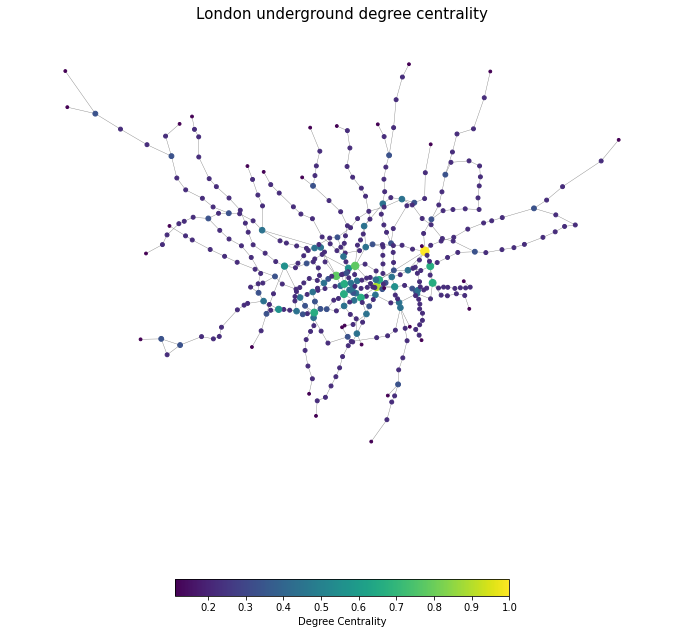

In [17]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*70 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on nodes:

In [18]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [19]:
# To dataframe using the nodes as the index
df2 = pd.DataFrame(index=G.nodes())
df2['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted2 = df2.sort_values(["betweenness_w"], ascending=False)
df_sorted2[0:10]

,betweenness_w
Bank and Monument,17656.0
King's Cross St. Pancras,16693.0
Stratford,14548.0
Oxford Circus,13561.0
Euston,13240.0
Baker Street,12150.0
Earl's Court,11475.0
Shadwell,11128.0
Waterloo,10408.0
South Kensington,10335.0


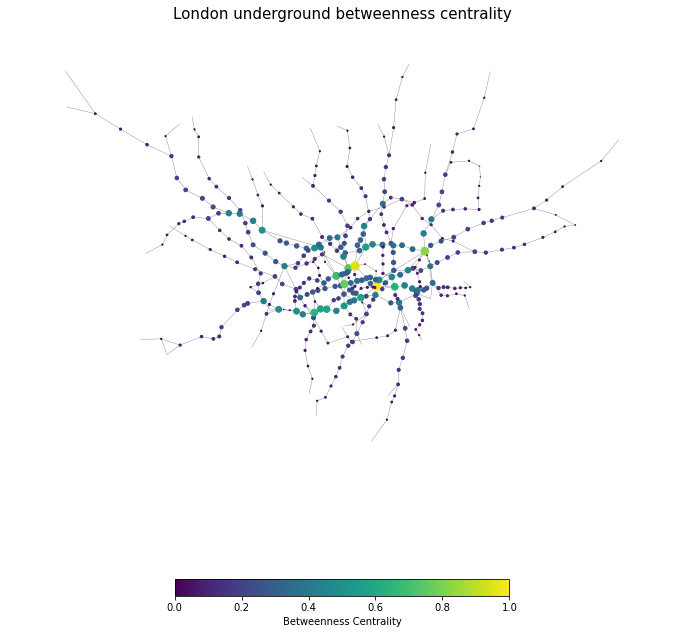

In [20]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*70 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground betweenness centrality",fontsize=15)
plt.show()

In [21]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df3 = pd.DataFrame(index=G.nodes())
df3['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted3 = df3.sort_values(["betweenness_t"], ascending=False)
df_sorted3[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


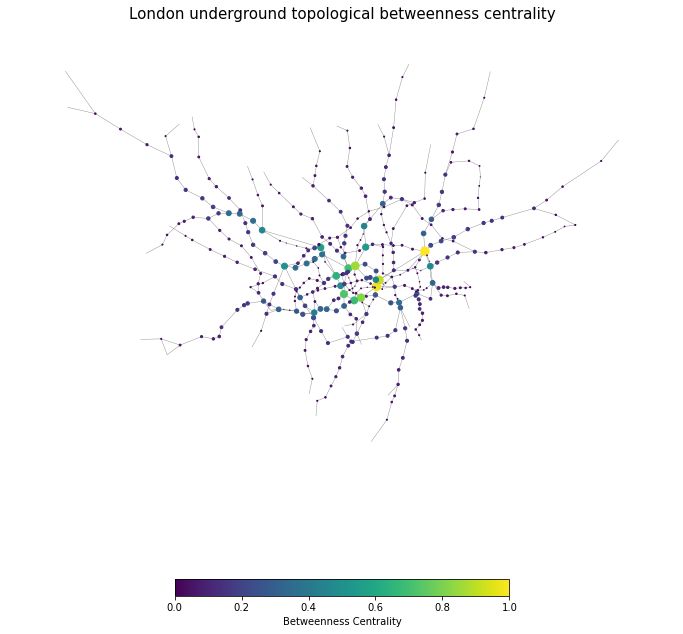

In [22]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*70 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological betweenness centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on the edges:

In [23]:
#Let us compute the betweenness centrality for the network, but this time lets do it in the edges!
bet_london_e=nx.edge_betweenness_centrality(G, normalized=False, weight='length')
# We can add these values to the edges attributes:
nx.set_edge_attributes(G,bet_london_e,'betweenness_e')

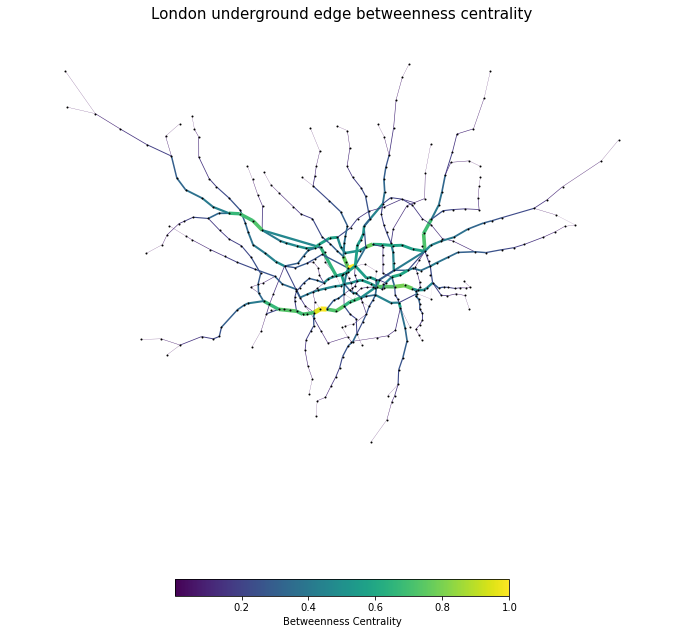

In [24]:
# Lets set color and width of edges according to betweenness values
betweenness_e_values=[(i[2]['betweenness_e']) for i in G.edges(data=True)]

bet_e_color=[(i[2]['betweenness_e']/max(betweenness_e_values)) for i in G.edges(data=True)]
bet_e_width=[(i[2]['betweenness_e']/max(betweenness_e_values)*5) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=bet_e_color, width=bet_e_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground edge betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality:

In [25]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df4 = pd.DataFrame(index=G.nodes())
df4['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted4 = df4.sort_values(["closeness_w"], ascending=False)
df_sorted4[0:10]

,closeness_w
Holborn,0.000079
King's Cross St. Pancras,0.000079
Tottenham Court Road,0.000079
Oxford Circus,0.000079
Leicester Square,0.000078
Piccadilly Circus,0.000078
Charing Cross,0.000078
Chancery Lane,0.000078
Covent Garden,0.000078
Embankment,0.000078


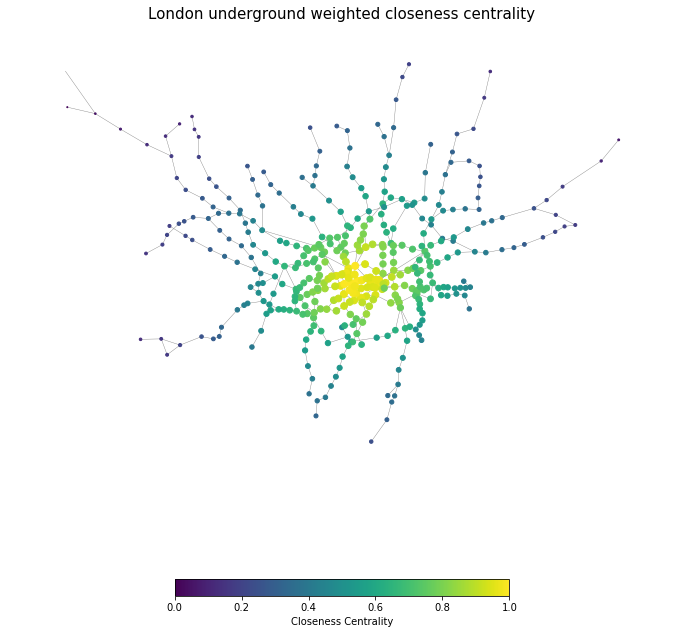

In [26]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground weighted closeness centrality",fontsize=15)
plt.show()

In [27]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df5 = pd.DataFrame(index=G.nodes())
df5['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted5 = df5.sort_values(["closeness_t"], ascending=False)
df_sorted5[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


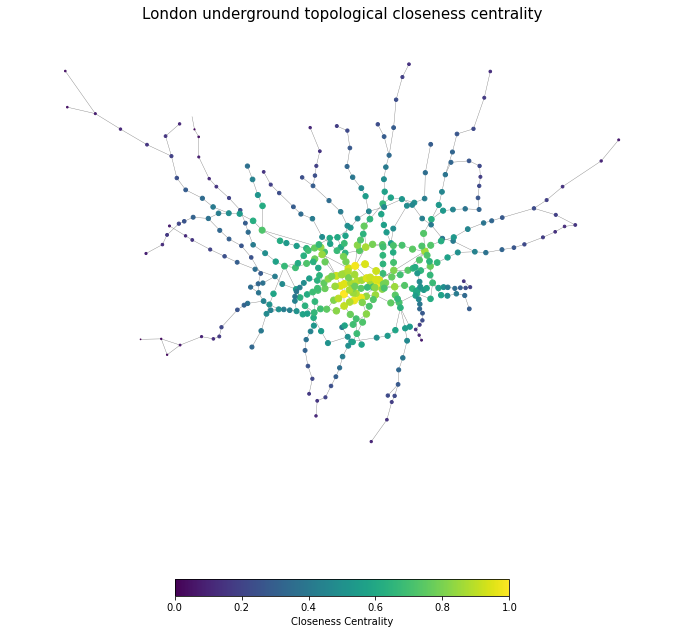

In [28]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological closeness centrality",fontsize=15)
plt.show()

In [29]:
nx.global_efficiency(G)

0.1012561935972123

## Impact measures

In [30]:
G2 = G
G3 = G
G4 = G

G5 = G
G6 = G
G7 = G

### Non-sequential removal

#### 1. degree centrality

In [31]:
# degree centrality
maxdeg=[n for n in G2.nodes() if G2.nodes[n]['degree'] == max(degree_values)]
maxdeg

['Stratford']

In [32]:
G2.remove_nodes_from(maxdeg)
nx.number_connected_components(G2)

3

In [33]:
# To comput the size ( number of node) of each component
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[379, 20, 1]

最大组织的节点数从401减少到379，下降20.4%

In [34]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G2.subgraph(largest_component)

In [35]:
nx.global_efficiency(G2)

0.08891736066510689

In [44]:
#删除第2个点
G2.remove_nodes_from(['Bank and Monument'])
nx.number_connected_components(G2)

3

In [45]:
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[378, 20, 1]

In [46]:
nx.global_efficiency(G2)

0.08586164448742485

In [59]:
#删除第3个点
G2.remove_nodes_from(["King's Cross St. Pancras"])

In [60]:
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[377, 20, 1]

In [61]:
nx.global_efficiency(G2)

0.08028700838265396

In [62]:
#删除第4个点
G2.remove_nodes_from(["Baker Street"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[374, 20, 2, 1]

In [63]:
nx.global_efficiency(G2)

0.07570039409751211

In [65]:
#删除第5个点
G2.remove_nodes_from(["Earl's Court"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[373, 20, 2, 1]

In [66]:
nx.global_efficiency(G2)

0.0740361229198828

In [67]:
#删除第6个点
G2.remove_nodes_from(["Oxford Circus"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[371, 20, 2, 1, 1]

In [68]:
nx.global_efficiency(G2)

0.07274535237569829

In [69]:
#删除第7个点
G2.remove_nodes_from(["Liverpool Street"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[365, 20, 2, 5, 1, 1]

In [70]:
nx.global_efficiency(G2)

0.07094844226118287

In [71]:
#删除第8个点
G2.remove_nodes_from(["Waterloo"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[364, 20, 2, 5, 1, 1]

In [72]:
nx.global_efficiency(G2)

0.06898194318071488

In [73]:
#删除第9个点
G2.remove_nodes_from(["Green Park"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[363, 20, 2, 5, 1, 1]

In [74]:
nx.global_efficiency(G2)

0.06825731584971681

In [75]:
#删除第10个点
G2.remove_nodes_from(["Canning Town"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[349, 20, 2, 5, 8, 1, 5, 1]

In [76]:
nx.global_efficiency(G2)

0.06338447666647608

In [77]:
#删除第11个点
G2.remove_nodes_from(["West Ham"])
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[345, 20, 2, 5, 2, 1, 8, 1, 5, 1]

In [78]:
nx.global_efficiency(G2)

0.062061403668075166